# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Описание проекта:

Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:

- В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
- Строят модель для предсказания объёма запасов в новых скважинах;
- Выбирают скважины с самыми высокими оценками значений;
- Определяют регион с максимальной суммарной прибылью отобранных скважин.

Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Построим модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой Bootstrap.

***Описание данных:***


- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# импорт необходимых библиотек


**Так как в нашем распоряжении 3 датасета, с которыми нам необходимо проработать по отдельности, мы будем писать функции, для исключения нагромождения кода. В каждом датасете есть столбец id, который в дальнейшем, для построения моделей нам будет не нужен, сразу далим его.**

In [2]:
def read_csv (data):
    df = pd.read_csv(data)
    df = df.drop(columns='id', axis=1)
    print(df.info(), 
          df.head(),
          sep = '\n')
    return df
# Создаем функцию которая считывет датафрейм, удаляет столбец ID и выводит информацию

In [3]:
df_0 = read_csv('/datasets/geo_data_0.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647


В датафрейме df_0 - 100 000 строк, пропусков нет, 3 столбца с признаками (f0, f1, f2) и один столбец с целевым признаком (product), столбец под названием 'id' мы удалили, поскольку для построения моделей он не нужен. Все столбцы имеют вещестенный формат.

In [4]:
df_1 = read_csv('/datasets/geo_data_1.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
          f0         f1        f2     product
0 -15.001348  -8.276000 -0.005876    3.179103
1  14.272088  -3.475083  0.999183   26.953261
2   6.263187  -5.948386  5.001160  134.766305
3 -13.081196 -11.506057  4.999415  137.945408
4  12.702195  -8.147433  5.004363  134.766305


В датафрейме df_1 - 100 000 строк, пропусков нет, 3 столбца с признаками (f0, f1, f2) и один столбец с целевым признаком (product), столбец под названием 'id' мы удалили, поскольку для построения моделей он не нужен. Все столбцы имеют вещестенный формат.

In [5]:
df_2 = read_csv('/datasets/geo_data_2.csv')
# считываем датафрейм и выводим информацию по нему

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
         f0        f1        f2     product
0 -1.146987  0.963328 -0.828965   27.758673
1  0.262778  0.269839 -2.530187   56.069697
2  0.194587  0.289035 -5.586433   62.871910
3  2.236060 -0.553760  0.930038  114.572842
4 -0.515993  1.716266  5.899011  149.600746


В датафрейме df_2 - 100 000 строк, пропусков нет, 3 столбца с признаками (f0, f1, f2) и один столбец с целевым признаком (product), столбец под названием 'id' мы удалили, поскольку для построения моделей он не нужен. Все столбцы имеют вещестенный формат.

### Вывод

При подготовке данных мы записали в переменые df_0, df_1, df_2 три датасета. При этом удалив из них столбец `id`, поскольку в дальнейшем для построения моделей он нам непонадобится. Так же мы узнали тип данных и убедились в отсутствии пропусков в данных.

## Обучение и проверка модели

Напишем функцию, которая будет делить на целевой и нецелевые признаки, делить на тренировочную и валидационные выборки в соотношении 75/25, а так же обучать модель и делать предсказания на валидационной выборке, сохранять предсказания и правильные ответы на валидационной выборке.

Выводить на экран средний запас истинных значений и средний запас предсказанного сырья и RMSE модели.

In [6]:
def train_valid_split(df):
    features = df.drop(['product'], axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                              target,
                                                                              test_size=.25,
                                                                              random_state=12345)
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    predictions_valid = pd.Series(model.predict(features_valid))
    
    rmse = mean_squared_error(target_valid, predictions_valid)**0.5 # считаем значение метрики RMSE на валидационной выборке
    
    mean_predictions_valid = predictions_valid.mean()
    
    
    print(f'Размер тренировочной выборки (строк/столбцов):{features_train.shape}',
          f'Размер валидационной выборки (строк/столбцов):{features_valid.shape}',
          f'Средний запас сырья на основе правильных ответов: {round(target_valid.mean(), 2)}',
          f'Средний запас предсказанного сырья: {round(mean_predictions_valid, 2)}',
          f'RMSE модели:{round(rmse, 2)}',
          sep = '\n')
    return predictions_valid, target_valid
# Напиcали функцию, которая будет делить на целевой и нецелевые признаки, и делить на тренировочную и валидационные выборки в соотношении 75/25.**

In [7]:
predictions_df0, target_df0 = train_valid_split(df_0)

Размер тренировочной выборки (строк/столбцов):(75000, 3)
Размер валидационной выборки (строк/столбцов):(25000, 3)
Средний запас сырья на основе правильных ответов: 92.08
Средний запас предсказанного сырья: 92.59
RMSE модели:37.58


In [8]:
predictions_df1, target_df1 = train_valid_split(df_1)

Размер тренировочной выборки (строк/столбцов):(75000, 3)
Размер валидационной выборки (строк/столбцов):(25000, 3)
Средний запас сырья на основе правильных ответов: 68.72
Средний запас предсказанного сырья: 68.73
RMSE модели:0.89


In [9]:
predictions_df2, target_df2 = train_valid_split(df_2)

Размер тренировочной выборки (строк/столбцов):(75000, 3)
Размер валидационной выборки (строк/столбцов):(25000, 3)
Средний запас сырья на основе правильных ответов: 94.88
Средний запас предсказанного сырья: 94.97
RMSE модели:40.03


### Вывод

Исходя из полученных значений можно сказать, что все модели так или иначе дают хорошие предсказания. Средние предсказаний почти равно средним правильных ответов, отличаясь лишь на сотые доли. Однако стоит отметить,что лучше всего себя показала вторая модель, там разница средних минимальна, так же как и минимальна среднеквадратичая ошибка (RMSE).

RMSE моделей:
- 1 модель: 37.58
- 2 модель: 0.89
- 3 модель: 40.03

## Подготовка к расчёту прибыли

Запишем в переменные исходные данные, которые нам были даны по условиям задания.

In [10]:
explore_point = 500 # количество исследуемых точек
mining_point = 200 # количество точек в разработке
budjet_mining = 10000 # бюджет разработки скважин в млн. рублей
income_one_barrel = .45 # доход с 1 тыс баррель в млн. руб
probability_of_losses = 2.5 # максимальная вероятность убытков
bootstrap_value = 1000 # количесто выборок данные для расчета по условиям задания

In [11]:
price_point = budjet_mining / mining_point # цена за разработки одной точки
break_even_point = price_point / income_one_barrel # достаточный объём сырья для безубыточной разработки новой скважины 
print(f'Необходимый объем сырья для того, чтобы разработка скважины была окупаемой составил: {round(break_even_point, 2)} тыс. баррелей')

Необходимый объем сырья для того, чтобы разработка скважины была окупаемой составил: 111.11 тыс. баррелей


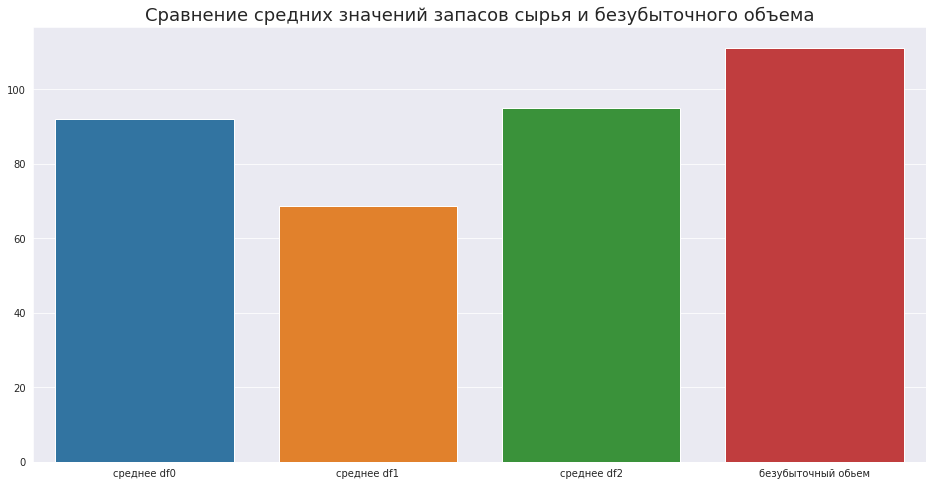

In [12]:
sns.set_style('darkgrid')
values_name = ['среднее df0','среднее df1','среднее df2','безубыточный обьем']
values_barrel = [target_df0.mean(), target_df1.mean(), target_df2.mean(),break_even_point]
plt.figure(figsize=(16,8))
barplot = sns.barplot(values_name,values_barrel)
barplot.set_title('Сравнение средних значений запасов сырья и безубыточного объема', fontdict={'fontsize':18})
plt.show()
# строим график barplot для сравнения результатов

### Вывод

Необходимый объем сырья для того, чтобы разработка скважины была окупаемой составил 111 тыс. баррелей.

Сравнив средние запасы сырья и достаточный объём сырья для безубыточной разработки новой скважины, можно сказать, средние значения запасов сырья для всех трех регионов ниже необходимого объема, при этом самый высокий показатель у третьей модели, однако он тоже далек до нужного значения. Есть риск, что выбранные случайным образом скважины для разработки, могут не окупить затраченные средства.

## Расчёт прибыли и рисков 

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

In [13]:
def profit (predictions, target, point):
    pred_sorted = predictions.sort_values(ascending=False) # выбираем необходимое коичество скважин с максимальным объемом нефти
    target_sorted = target[pred_sorted.index][:point] # определяем верные значения для отобранных скважин
    profit = target_sorted.sum() * income_one_barrel - budjet_mining # доход в млн. рублей с выбранных скважин
    return profit


In [14]:
print(f'Итоговая прибыль по регионам, с 200 выбранных по предсказаниям модели скважин составит:',
      f'Первый регион: {round(profit(predictions_df0, target_df0.reset_index(drop=True), mining_point), 3)} млн. рублей',
      f'Второй регион: {round(profit(predictions_df1, target_df1.reset_index(drop=True), mining_point), 3)} млн. рублей',
      f'Третий регион: {round(profit(predictions_df2, target_df2.reset_index(drop=True), mining_point), 3)} млн. рублей',
      sep='\n')



Итоговая прибыль по регионам, с 200 выбранных по предсказаниям модели скважин составит:
Первый регион: 3320.826 млн. рублей
Второй регион: 2415.087 млн. рублей
Третий регион: 2710.35 млн. рублей


По итогам исследования итоговой прибыли по регионам основанной на 25000 скважинах по каждому региону, и сделав выводы по 200 скважин с максимальным объемом нефти выбранным по предсказанием модели скважин, можно сделать вывод:
- все регионы имеют неплохую доходность от 2415 до 3320 млн. рублей
- наиболее прибыльным можно назвать первый регион со значением 3320 млн. рублей

Однако, для того чтобы получить данную доходность по 200 лучшим скважинам, нам необходимо произвести геолоразведку по 25000 точкам в каждом регионе. Данную процедуру считаю сильно затратной, в данном случае цель не поравдывает средства. По условиям задачи, нам необходимо посчитать лучший регион исходя из 500 случайно выбранных скважин в каждом, из которых с помощью машинного обучения выбирать 200 лучших для разработки. При этом бюджет на разработку скважин в регионе — не должен превышать 10 млрд рублей. Далее мы посмотрим как изменится при этом прибыль в каждом регионе.

Напишем функцию с применением техники `Bootstrap` с 1000 выборок, чтобы найти распределение прибыли, так же найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. 

In [15]:
def profit_distribution(predictions, target, bootstrap, point):
    state = np.random.RandomState(12345)
    profit_values = [] #список значений выручки на основе 1000 выборок
    
    for i in range(bootstrap_value):
        target_subsample = target.reset_index(drop=True).sample(explore_point,
                                         replace=True,
                                         random_state=state)
        predict_subsample = predictions[target_subsample.index]
        
        result = profit(predict_subsample, target_subsample, mining_point)
        profit_values.append(result)
        
    profit_values = pd.Series(profit_values)
    mean_profit = profit_values.mean()
    confidence_interval = (profit_values.quantile(0.025), profit_values.quantile(0.975))
    negative_profit_chance = ((profit_values < 0).mean())*100
    print(f'Средняя выручка: {round(mean_profit,2)} млн рублей',
          f'95%-ый доверительный интервал: {confidence_interval}',
          f'Вероятность убытков равна: {negative_profit_chance}% ',
          sep = '\n')
    if probability_of_losses > negative_profit_chance:
        print('Вероятность является меньше допустимой, регион подходит по критериям')
    else:
        print('Вероятность является больше допустимой, регион не подходит по критериям')

In [16]:
profit_distribution(predictions_df0, target_df0, bootstrap_value, mining_point)

Средняя выручка: 425.94 млн рублей
95%-ый доверительный интервал: (-102.09009483793592, 947.976353358369)
Вероятность убытков равна: 6.0% 
Вероятность является больше допустимой, регион не подходит по критериям


In [17]:
profit_distribution(predictions_df1, target_df1, bootstrap_value, mining_point)

Средняя выручка: 515.22 млн рублей
95%-ый доверительный интервал: (68.87322537050254, 931.547591257049)
Вероятность убытков равна: 1.0% 
Вероятность является меньше допустимой, регион подходит по критериям


In [18]:
profit_distribution(predictions_df2, target_df2, bootstrap_value, mining_point)

Средняя выручка: 435.01 млн рублей
95%-ый доверительный интервал: (-128.88054732978893, 969.7069541802657)
Вероятность убытков равна: 6.4% 
Вероятность является больше допустимой, регион не подходит по критериям


### Вывод

По итогам нашего исследования, можно сделать следующие выводы:
- При случайном исследовании 500 скважин прибыль падает почти в 6 раз, в отличие исследования основанном на 25000 скважинах, однако стоит отмечтить, что при разработке 25000 скважин, в отличии от 500 у заказчика вырастают и расходы на разработку в 50 раз.
- По итогам исследования лучшая средняя выручка отмечена во втором регионе, ее размер составил 515.22 млн рублей. В первом регионе значение составило 425.94 млн рублей, во третьем регионе 435.01 млн рублей.
- Рассчитав вероятность убытков, мы выяснили что наменее вероятны убытки так же во втором регионе, они составили всего 1%, по условиям задания вероятность не должна превышать более 2.5%. В первом регионе вероятность убытков 6%, в третьем 6.4%, что по условиям нашего задания является недопустимым.

**Второй регион оказался лидирующем по всем показателям, в связи с этим рекомендую заказчику для дальнейшей разработки принять только второй регион**